In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

In [3]:
df = pd.read_csv('../input/ted-talks/ted_main.csv')

In [4]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wes', 'Thus', 'Fri', 'Sat', 'Sun']

In [5]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [6]:
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

 # Features Available
 
* 1 **comments** : number of comments by the viewers.
* 2 **description** : topic of the talk
* 3 **duration** : duration of the talk in secounds 
* 4 **film date** : time of the event took place(in unix time format)
* 5 **language**:  number of languages in which talk is published
* 6 **main speaker** : speaker who delivered the speech.
* 7 **name **: Title of the talk and speaker name.
* 8 **num_speaker**: number of speaker.
* 9 **published_date**: time when it was published(unix time format)
* 10 **ratings**:  ratings given to according to type of talk 
* 11 **related_talks**: suggetion to watch next vedios
* 12 **speaker_occupation** : occupation of speaker 
* 13** tags** : subjects relatedd to talk
* 14 **title** : main ideas
* 15 **url**: the UrL of the talks.
* 16 **views** : number of viewrs for each talks 

# Convert unix time to datetime timestamp
unix timestamp(The number of seconds between a particular date and the Unix Epoch on January 1st, 1970)

In [7]:
import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [8]:
df.head()


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,25-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,24-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,26-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,27-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,22-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


To see the number of rows and columns

In [9]:
df.shape

(2550, 17)

**TO check the type of veriable. Numbers are stored as Int or float. Object are stored as  

In [10]:



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   object
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   object
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

# Correlation betweeen the numerical veriables(usually counts between -1 to +1)
For example we can see that there is realtion between comments and views

In [11]:
df.corr()

,comments,duration,languages,num_speaker,views
comments,1.000000,0.140694,0.318284,-0.035489,0.530939
duration,0.140694,1.000000,-0.295681,0.022257,0.048740
languages,0.318284,-0.295681,1.000000,-0.063100,0.377623
num_speaker,-0.035489,0.022257,-0.063100,1.000000,-0.026389
views,0.530939,0.048740,0.377623,-0.026389,1.000000


# Now we want to check most popular talks according to views

In [12]:
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [13]:
popular_talks = df[['main_speaker','title','views','film_date','published_date']].sort_values('views', ascending = False)

In [14]:
popular_talks = popular_talks.head(15)

# Findings

* we can see that Ken Robinsons talks named "Do schools kill creativity?" had more viwers than others. Maybe it became popular because of it's title and most of them did not like school("-").
* Only two talks got over 4 million viewers here.
* At row number 8 we can observe Tony Robbins speech titled "Why we do what we do" was viewed only half compear to Ken Robinson although it became publish as same time  year of 2006.


Let vizualise the number of views for each speaker 
By appling the lamda function i took first three letter of writers name.

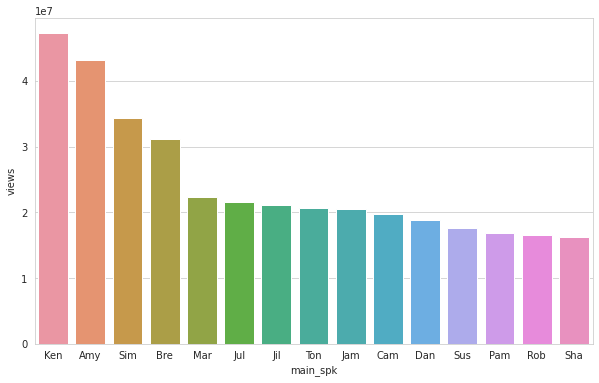

In [15]:
popular_talks['main_spk'] = popular_talks['main_speaker'].apply(lambda x:x[:3])
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

sns.barplot(x= 'main_spk', y = 'views', data = popular_talks)



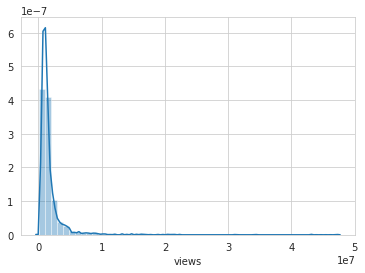

In [16]:
sns.distplot(df['views'])


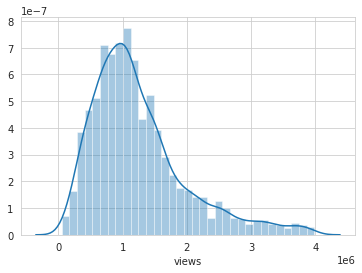

In [17]:
sns.distplot(df[df['views'] < 0.4e7]['views'])

* here we can see most the Talks viewd around 1 million.
* In upper written code we have written ['views'] 2 times because we had to use operators inside the code.

# ### we can also get information  more clearly by Describe function

In [18]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

* Here we find median of the views 1.12 million
* The maximum views above then 4 million
* The average number of views are 1.69 million.

# Comments
Although the TED website gives us access to all the comments posted publicly, this dataset only gives us the number of comments. We will therefore have to restrict our analysis to this feature only. You could try performing textual analysis by scraping the website for comments

In [19]:
df['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

#  Findings 
* On average, there are 191.5 comments on every TED Talk. Assuming the comments are constructive criticism, we can conclude that the TED Online Community is highly involved in discussions revolving TED Talks.

* There is a huge standard deviation associated with the comments. In fact, it is even larger than the mean suggesting that the measures may be sensitive to outliers. We shall plot this to check the nature of the distribution.

* The minimum number of comments on a talk is 2 and the maximum is 6404. The range is 6402.. The minimum number, though, may be as a result of the talk being posted extremely recently


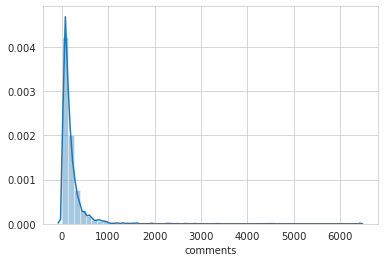

In [20]:
sns.distplot(df['comments'])

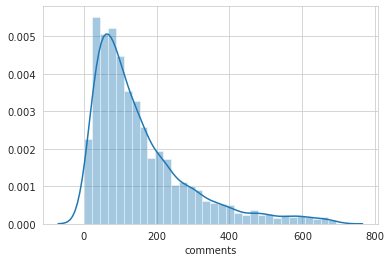

In [21]:
sns.distplot(df[df['comments'] < 700]['comments'])

From the plot above, we can see that the bulk of the talks have fewer than 700 comments. This clearly suggests that the mean obtained above has been heavily influenced by outliers. This is possible because the number of samples is only 2550 talks.

Another question that I am interested in is if the number of views is correlated with the number of comments. We should think that this is the case as more popular videos tend to have more comments. Let us find out

In [22]:
df[['comments','views']].corr()

,comments,views
comments,1.000000,0.530939
views,0.530939,1.000000


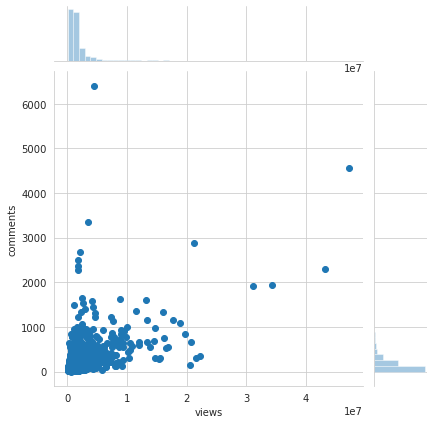

In [23]:
sns.jointplot(x='views', y='comments', data=df)


From correlation matrix and jointplot we can observe that there is **more then 0.5 positive correlation** between views and comments.  


Let see number of comments for 15 most viewd talks.

In [24]:
df[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(15)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


* . Most commented talked from Biologist Richard Dawkins launches into a full-on appeal for atheists to make public their beliefs and to aggressively fight the incursion of religion into politics and education.
* . Most of the talk was related to*** support or controvercy about Religion and Living Life***.
* . Some talks got more comments becasuse it was published before than others.



**Now we will measure the ratio of the views and comments to check which onr is the largest discussion quotient(where you can join the discussion and see a list of open tasks)
**

In [25]:
df['dis_quo'] = df['comments']/df['views']

In [26]:
 df[['title', 'main_speaker','views', 'comments', 'dis_quo', 'film_date' ]].sort_values('dis_quo', ascending=False).head(15)

,title,main_speaker,views,comments,dis_quo,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,02-12-2009
803,E-voting without fraud,David Bismark,543551,834,0.001534,14-07-2010
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,02-02-2002
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,10-02-2010
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,03-03-2011
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,10-10-2010
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,08-12-2010
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,18-03-2014
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,11-02-2010
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,04-11-2009


* Most of the comment goes to the "The case for same-sex marriage" which was published at 2009.


# Analysing TED Talks by the month and the year

* TED talks occours all the year round but specific period of time it is more popular. Lets try to find the distribution talks according to months


In [27]:
df['film_date'] = pd.to_datetime(df['film_date'])
df['month'] = df['film_date'].dt.month

month_map = {0:'unk',1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}


df['month'] = df['month'].map(month_map)



In [28]:
df['film_date'] = pd.to_datetime(df['film_date'])
df['month'] = df['film_date'].dt.month

In [29]:
month_df = pd.DataFrame(df['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']


In [1]:
sns.barplot(x='month', y='talks', data=month_df ,order = month_order)


NameError: name 'sns' is not defined

* It is  clearly showing that hieghst number of conference took place At **February* .
* August and September are lowest.
* there are two kinds of talks ted and tedx
* The difference between TED and TEDx events are that the former takes more of a global approach while the latter typically focuses on a local community that concentrates on local voices. “Officially, the 'x' in TEDx stands for independently organized TED event - but it's more of a TED multiplied

* Now i am going to check ditribution for only TEDx.

In [31]:
df_TEDx = df[df['event'].str.contains('TEDx')]
TEDx_mon_df = pd.DataFrame(df_TEDx['month'].value_counts().reset_index())
TEDx_mon_df.columns = ['month', 'talks']

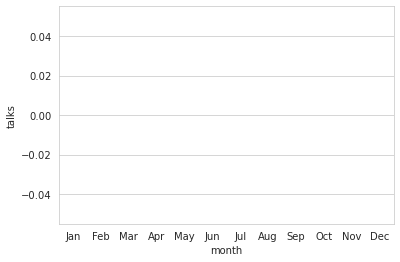

In [32]:
sns.barplot(x= 'month', y = 'talks', data = TEDx_mon_df, order = month_order)

* Now we can see that November is the popular month for TEDx. We can not take this result because only few TEDx talks became published in te d talks website. 


* Now we will discover most popular days to conduting TED and TEDx talks.


In [33]:
df['film_date'] = pd.to_datetime(df['film_date'])
df['Day_of_Week'] = df['film_date'].apply(lambda time: time.dayofweek)

df['Day_of_Week'].head(15)
day_map = {0: 'Mon',1:'Tue', 2: 'Wes', 3:'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

df['day'] = df['Day_of_Week'].map(day_map)

In [34]:
df['day']
day_df = pd.DataFrame(df['day'].value_counts()).reset_index()

day_df.columns = ['day', 'talks']


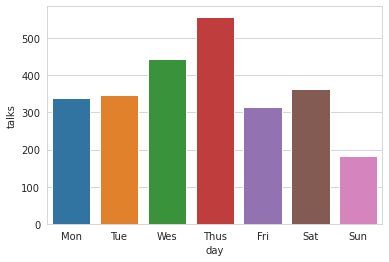

In [35]:
sns.barplot(x = 'day', y = 'talks', data = day_df, order = day_order)

* The distribution of days is almost a bell curve with **Wednesday** and **Thursday **being the most popular days and **Sunday** being the least popular. This is pretty interesting because I was of the opinion that most TED Conferences would happen sometime in the weekend.

* lets check what is the condition according to year.


In [36]:
df['film_date'] = pd.to_datetime(df['film_date'])
df['year'] = df['film_date'].dt.year
year_df =pd.DataFrame(df['year'].value_counts()).reset_index()
year_df.columns = ['year', 'talks']

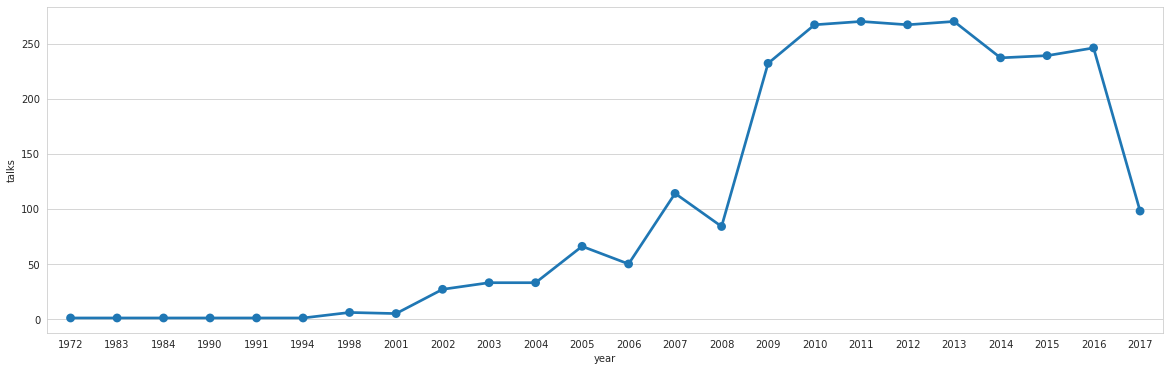

In [37]:
plt.figure(figsize=(20,6))

sns.pointplot(x='year', y = 'talks', data = year_df)


* Number of talks rapidly incresed from 2009 it became 2 times bigger then before. After that it went constant.



* Finally, to put it all together, let us construct a heat map that shows us the number of talks by month and year. This will give us a good summary of the distribution of talks

In [38]:
new_df = pd.pivot_table(df, values= 'title', index='month', columns='year', aggfunc='count', fill_value= 0)

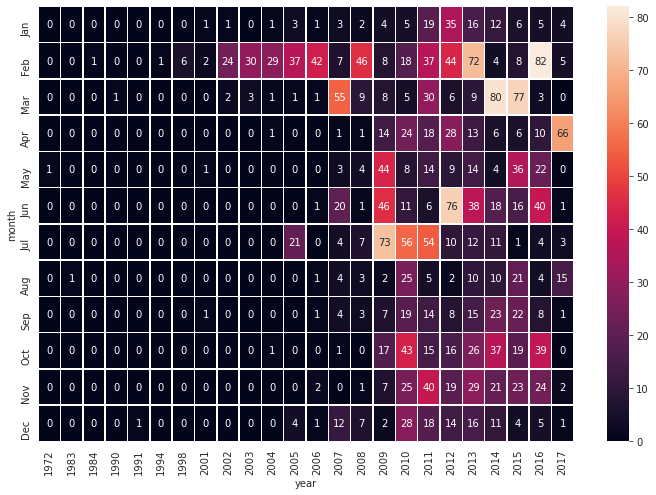

In [39]:
f, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(new_df, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order)



# TED Speakers
* In this part we like to extract informations about Speakers..

* Lets see who has preasented highest number of talks to motivate people.

In [40]:
speaker_df = df.groupby(['main_speaker']).count().reset_index()[['main_speaker', 'ratings']]
speaker_df.columns = ['main_speaker', 'num_of_talks']
speaker_df = speaker_df.sort_values('num_of_talks', ascending=False)
speaker_df.head(10)


,main_speaker,num_of_talks
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


* Hans Rosling, is clearly the most popular TED Speakers his talk was releted to Health worldwide ,with more than 9 num_of_talks on the TED Forum. Juan Enriquez comes a close second with 7 num_of Talks. Rives and Marco Tempest have graced the TED platform 6 times.


* we will see what kind of professionals are more popular in TED talks.


In [41]:
occupation_df = df.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['occupation', 'num_of_talks']

occupation_df =  occupation_df.sort_values('num_of_talks', ascending = False)

In [42]:
occupation_df

,occupation,num_of_talks
1426,Writer,45
83,Artist,34
413,Designer,34
753,Journalist,33
515,Entrepreneur,31
...,...,...
554,"Eye surgeon, inventor",1
553,"Explorer, inventor and outer space dreamer",1
552,"Explorer, ethnographer",1
551,Explorer and filmmaker,1


In [43]:
plt.figure(figsize=(15,5))
sns.barplot(x= 'speaker_occupation', y = 'num_of_talks', data = occupation_df.head(10) )

ValueError: Could not interpret input 'speaker_occupation'

<Figure size 1080x360 with 0 Axes>

* It is obvious that highest number of spekers introduced themselves as a speaker
* Artist and Designer goes in secound as speaker.


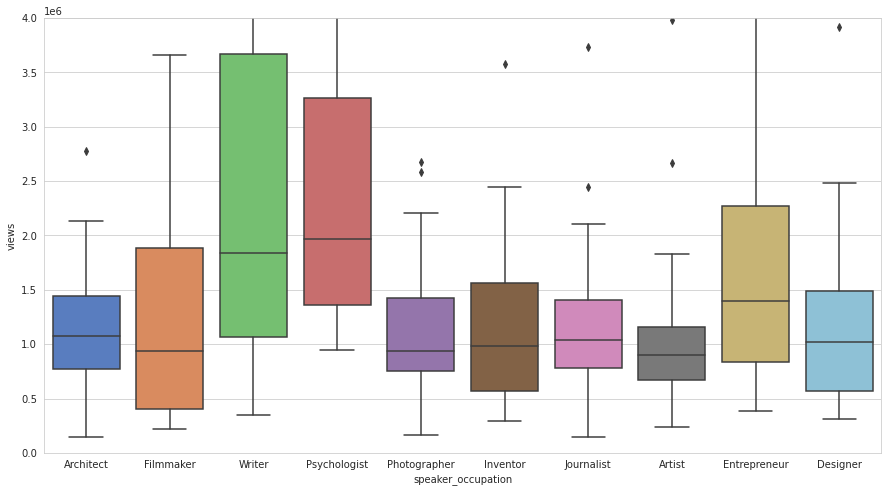

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='speaker_occupation', y='views', data=df[df['speaker_occupation'].isin(occupation_df.head(10)['occupation'])], palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])
plt.show()
